In [158]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# IRIS data for SVM

In [159]:
from sklearn import svm,datasets
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:,2:4]
Y = iris.target
#print X
#print Y
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X,Y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [160]:
pred = clf.predict(X)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,pred)
print cm

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [161]:
from matplotlib.colors import ListedColormap
import pylab as pl
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.axis('tight')
    pl.axis('off')
    pl.tight_layout()


# 畫出ＳＶＭ by linear

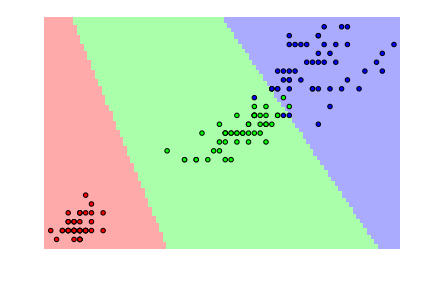

In [162]:
import numpy as np
clf = svm.SVC(C=1.0 ,kernel='linear')
clf.fit(X,Y)
plot_estimator(clf,X,Y)


# 調大margin的距離

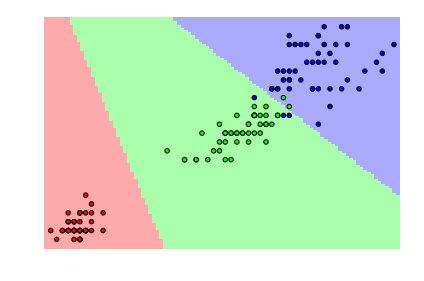

In [163]:
clf = svm.SVC(C=100000.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

# 畫出SVM by poly

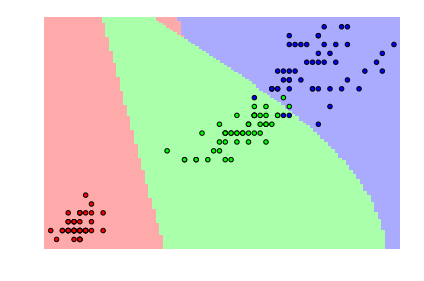

In [164]:
import numpy as np
clf = svm.SVC(C=1.0,kernel='poly')
clf.fit(X,Y)
plot_estimator(clf,X,Y)

In [165]:
X,Y = X[Y!=0] ,Y[Y!=0]
Y = Y-1 # for it takes binary label only
n_samples , n_features = X.shape
#print X

In [166]:
print X.shape
print Y.shape


(100, 2)
(100,)


# split data for trainning

In [173]:
from sklearn.cross_validation import train_test_split
X_train ,X_test, Y_train, Y_test = train_test_split(X ,Y , test_size=0.30, random_state=42)

In [174]:
print X_test.shape
print X_train.shape
print Y_test.shape
print Y_train.shape

(30, 2)
(70, 2)
(30,)
(70,)


# Run classifier

In [175]:
classifier = svm.SVC(kernel='linear',probability=True)
probas_ = classifier.fit(X_train,Y_train).predict_proba(X_test)
print probas_[:,1]
print probas_

[  5.62716644e-01   9.62354931e-01   9.95027282e-01   1.31402137e-02
   1.82996669e-02   8.25699249e-03   3.68484870e-01   9.96185337e-01
   4.15907436e-04   1.57821538e-01   1.05302367e-01   1.91615273e-03
   6.12097477e-01   6.45491960e-01   9.94686808e-01   1.49173430e-01
   5.12981095e-01   6.12097477e-01   3.05082901e-03   9.22935961e-04
   9.99999783e-01   5.12981095e-01   2.18235624e-01   5.92537187e-03
   4.63354102e-01   5.58920390e-02   2.90676684e-02   7.65139034e-01
   7.72552797e-03   9.99999810e-01]
[[  4.37283356e-01   5.62716644e-01]
 [  3.76450686e-02   9.62354931e-01]
 [  4.97271759e-03   9.95027282e-01]
 [  9.86859786e-01   1.31402137e-02]
 [  9.81700333e-01   1.82996669e-02]
 [  9.91743008e-01   8.25699249e-03]
 [  6.31515130e-01   3.68484870e-01]
 [  3.81466324e-03   9.96185337e-01]
 [  9.99584093e-01   4.15907436e-04]
 [  8.42178462e-01   1.57821538e-01]
 [  8.94697633e-01   1.05302367e-01]
 [  9.98083847e-01   1.91615273e-03]
 [  3.87902523e-01   6.12097477e-01]


In [176]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,probas_[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.972851


# 畫出ROC curve 

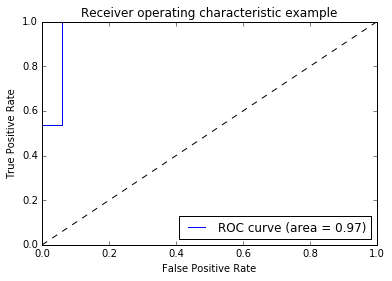

In [177]:
#plot ROC curve
import pylab as pl
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()